In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
from matplotlib.patches import Patch

# Add every font at the specified location
font_dir = ["fonts"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams["font.family"] = "umr10"
rcParams["font.size"] = 16

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

In [4]:
airlines_connections_dataset = pd.read_csv("data/german_airline_connection_costs.csv")

In [5]:
graph = nx.from_pandas_edgelist(
    airlines_connections_dataset,
    source="Source",
    target="Target",
    edge_attr="Cost",
    create_using=nx.DiGraph(),
)

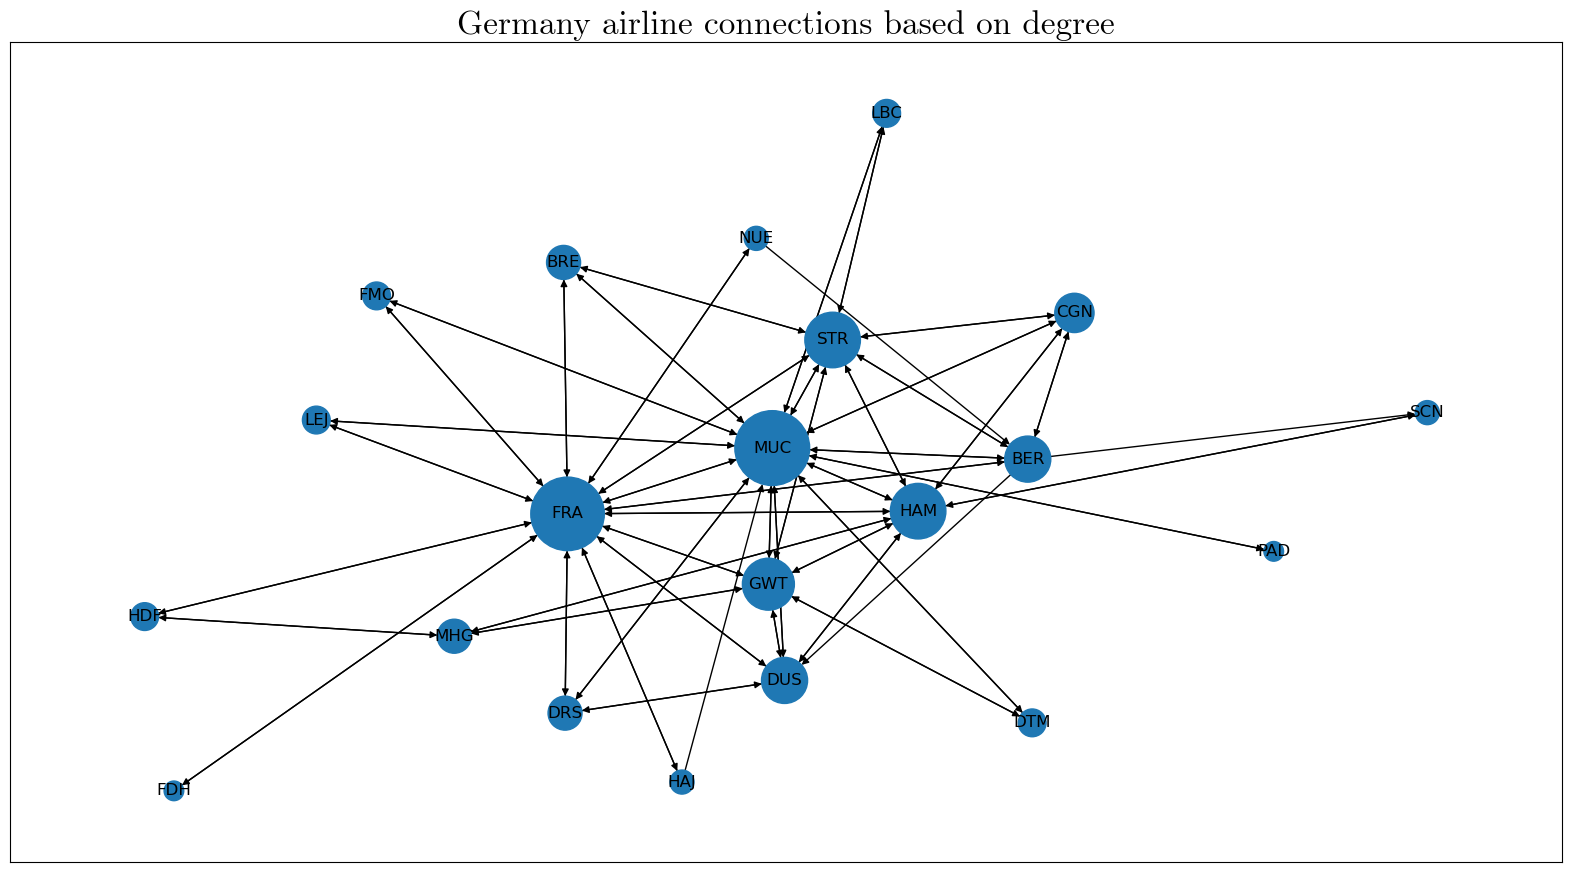

In [6]:
degrees = dict(nx.degree(graph))

plt.figure(figsize=(16, 9))
nx.draw_networkx(G=graph, node_size=[100 * value for value in degrees.values()])
plt.title("Germany airline connections based on degree", fontsize=24)
plt.tight_layout()
plt.savefig(
    "images/networkx_degree.png",
    bbox_inches="tight",
    dpi=400,
)

In [7]:
germany_map = Basemap(
    projection="merc",
    llcrnrlon=4,
    llcrnrlat=47,
    urcrnrlon=16,
    urcrnrlat=56,
    lat_ts=0,
    resolution="f",
    suppress_ticks=True,
)

In [8]:
geo_location_dataset = pd.read_csv("data/geo_location.csv")
geo_location_dataset["Name"] = geo_location_dataset["Name"].apply(
    lambda x: x.split("(")[1][:-1]
)
geo_location_dataset.head()

,Name,Latitude,Longitude
0,BER,52.366667,13.503333
1,BWE,52.319199,10.556100
2,BRE,53.047501,8.786670
3,CGN,50.865898,7.142740
4,DTM,51.518299,7.612240


In [9]:
mx, my = germany_map(
    geo_location_dataset["Longitude"].values, geo_location_dataset["Latitude"].values
)
pos = {}
for count, elem in enumerate(geo_location_dataset["Name"]):
    pos[elem] = (mx[count], my[count])

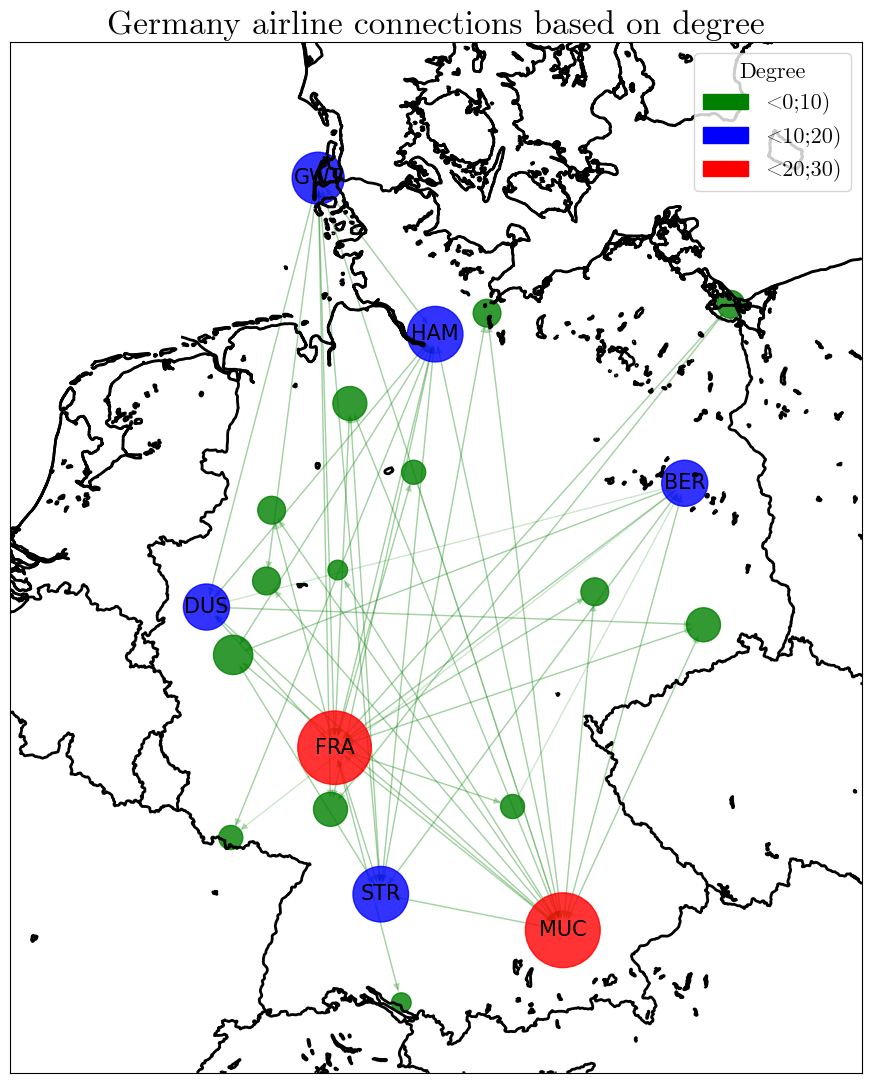

In [10]:
degrees = dict(nx.degree(graph))
plt.figure(figsize=(9, 16))
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[node for node in graph.nodes() if 0 <= degrees[node] < 10],
    node_color="g",
    alpha=0.8,
    node_size=[
        degrees[node] * 100 for node in graph.nodes() if 0 <= degrees[node] < 10
    ],
)
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[node for node in graph.nodes() if 10 <= degrees[node] < 20],
    node_color="b",
    alpha=0.8,
    node_size=[
        degrees[node] * 100 for node in graph.nodes() if 10 <= degrees[node] < 20
    ],
)
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[node for node in graph.nodes() if 20 <= degrees[node] < 30],
    node_color="r",
    alpha=0.8,
    node_size=[
        degrees[node] * 100 for node in graph.nodes() if 20 <= degrees[node] < 30
    ],
)
nx.draw_networkx_edges(G=graph, pos=pos, edge_color="g", alpha=0.2, arrows=True)
nx.draw_networkx_labels(
    G=graph,
    pos=pos,
    font_size=15,
    labels={x: x for x in graph.nodes() if degrees[x] >= 10},
)

germany_map.drawcountries(linewidth=2)
germany_map.drawstates(linewidth=0.2)
germany_map.drawcoastlines(linewidth=2)
plt.tight_layout()
plt.title("Germany airline connections based on degree", fontsize=24)

green_patch = Patch(color="g", label="<0;10)")
blue_patch = Patch(color="b", label="<10;20)")
red_patch = Patch(color="r", label="<20;30)")
plt.legend(
    handles=[green_patch, blue_patch, red_patch],
    title="Degree",
    loc="best",
    fancybox=True,
)

plt.savefig(
    "images/networkx_degree_on_map.png",
    bbox_inches="tight",
    dpi=400,
)

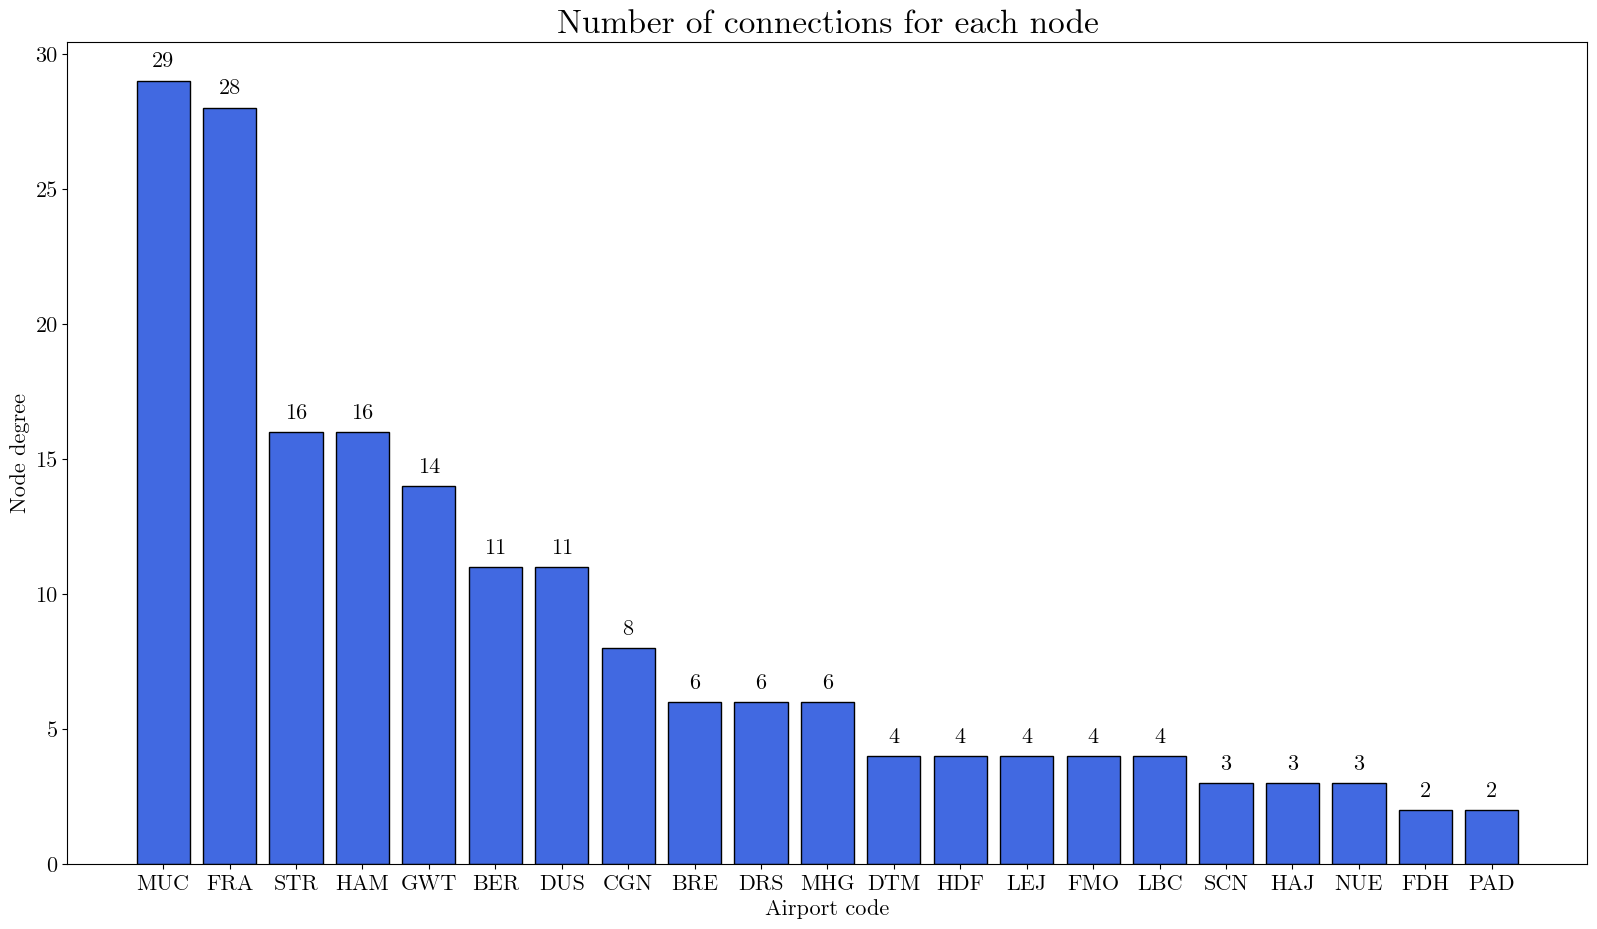

In [11]:
nodes_degree_sorted = [
    node for node, degree in sorted(nx.degree(graph), key=lambda x: x[1], reverse=True)
]
degrees_sorted = [
    degree
    for node, degree in sorted(nx.degree(graph), key=lambda x: x[1], reverse=True)
]

plt.figure(figsize=(16, 9))
plt.bar(
    nodes_degree_sorted, degrees_sorted, color="royalblue", width=0.8, edgecolor="black"
)
for i in range(len(graph.nodes)):
    plt.text(i, degrees_sorted[i] + 0.5, degrees_sorted[i], ha="center")

plt.tight_layout()
plt.xlabel("Airport code")
plt.ylabel("Node degree")
plt.title("Number of connections for each node", fontsize=24)

plt.savefig(
    "images/degree_barplot.png",
    bbox_inches="tight",
    dpi=400,
)

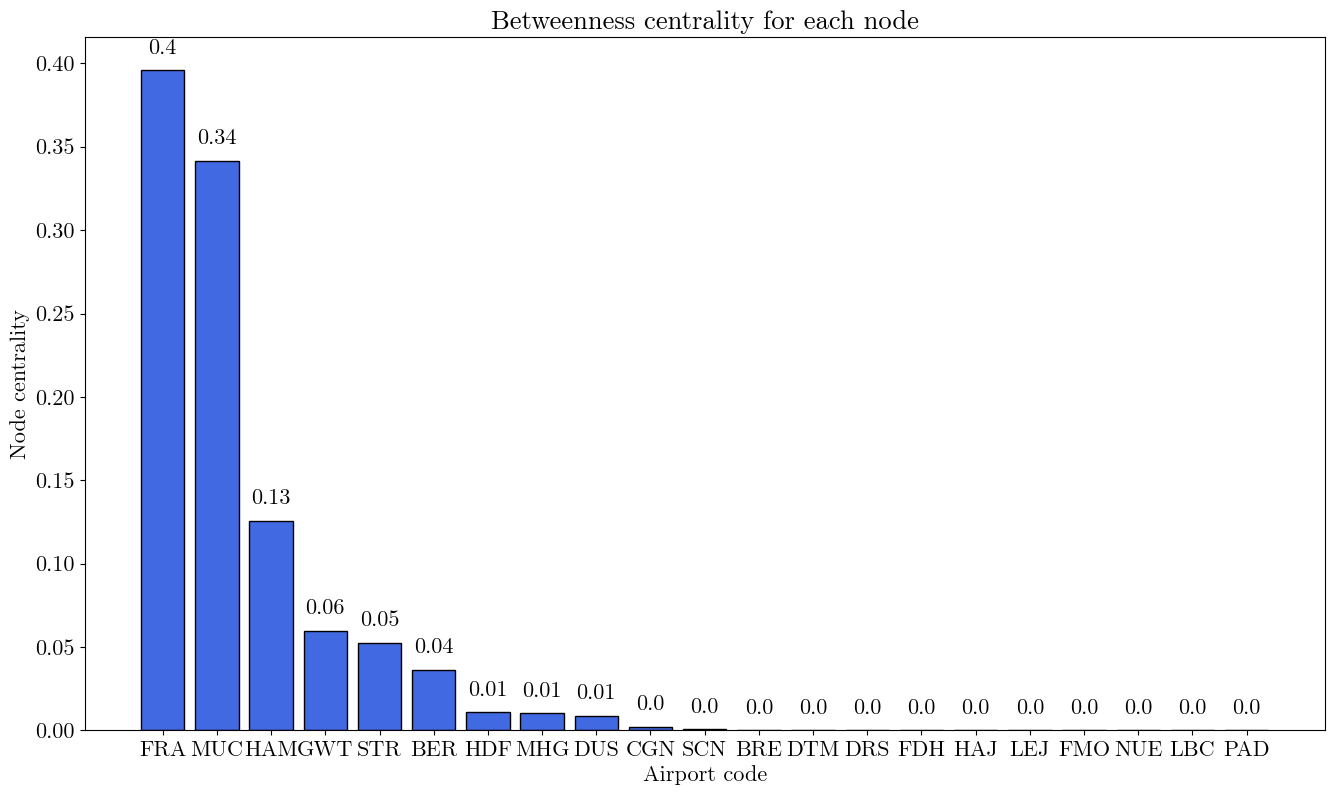

In [12]:
nodes_betweenness_sorted = [
    n
    for n, v in sorted(
        nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]
values_betweenness_sorted = [
    v
    for n, v in sorted(
        nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]

betweenness_dict = dict(
    [
        (key, value)
        for i, (key, value) in enumerate(
            zip(nodes_betweenness_sorted, values_betweenness_sorted)
        )
    ]
)

plt.figure(figsize=(16, 9))
plt.bar(
    nodes_betweenness_sorted,
    values_betweenness_sorted,
    color="royalblue",
    width=0.8,
    edgecolor="black",
)
for i in range(len(graph.nodes)):
    plt.text(
        i,
        values_betweenness_sorted[i] + 0.01,
        round(values_betweenness_sorted[i], 2),
        ha="center",
    )

plt.xlabel("Airport code")
plt.ylabel("Node centrality")
plt.title("Betweenness centrality for each node")

plt.savefig(
    "images/betweenness_centrality_barplot.png",
    bbox_inches="tight",
    dpi=400,
)

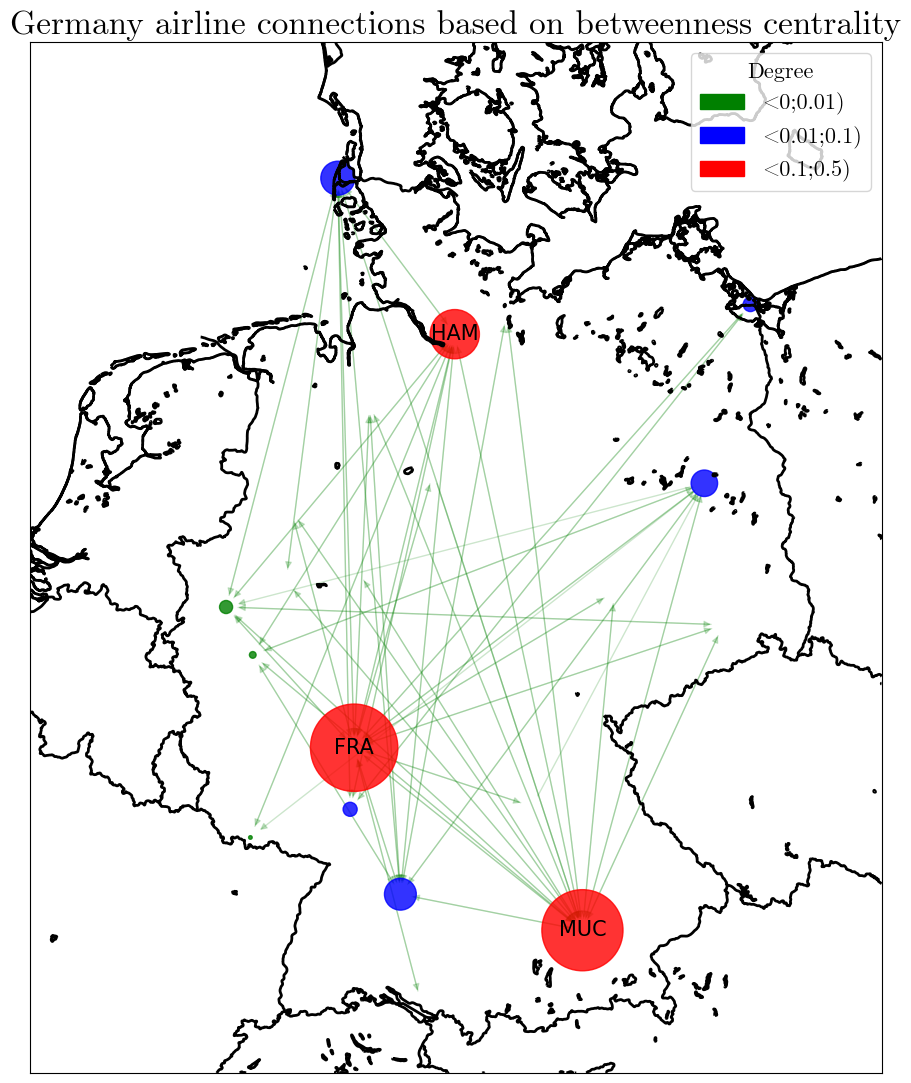

In [13]:
plt.figure(figsize=(9, 16))
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[
        node for node in nodes_betweenness_sorted if 0 <= betweenness_dict[node] < 0.01
    ],
    node_color="g",
    alpha=0.8,
    node_size=[
        betweenness_dict[node] * 10000
        for node in nodes_betweenness_sorted
        if 0 <= betweenness_dict[node] < 0.01
    ],
)
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[
        node
        for node in nodes_betweenness_sorted
        if 0.01 <= betweenness_dict[node] < 0.1
    ],
    node_color="b",
    alpha=0.8,
    node_size=[
        betweenness_dict[node] * 10000
        for node in nodes_betweenness_sorted
        if 0.01 <= betweenness_dict[node] < 0.1
    ],
)
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[
        node for node in nodes_betweenness_sorted if 0.1 <= betweenness_dict[node] < 0.5
    ],
    node_color="r",
    alpha=0.8,
    node_size=[
        betweenness_dict[node] * 10000
        for node in nodes_betweenness_sorted
        if 0.1 <= betweenness_dict[node] < 0.5
    ],
)
nx.draw_networkx_edges(G=graph, pos=pos, edge_color="g", alpha=0.2, arrows=True)
nx.draw_networkx_labels(
    G=graph,
    pos=pos,
    font_size=15,
    labels={x: x for x in nodes_betweenness_sorted if betweenness_dict[x] >= 0.1},
)

germany_map.drawcountries(linewidth=2)
germany_map.drawstates(linewidth=0.2)
germany_map.drawcoastlines(linewidth=2)
plt.tight_layout()
plt.title("Germany airline connections based on betweenness centrality", fontsize=24)

green_patch = Patch(color="g", label="<0;0.01)")
blue_patch = Patch(color="b", label="<0.01;0.1)")
red_patch = Patch(color="r", label="<0.1;0.5)")
plt.legend(
    handles=[green_patch, blue_patch, red_patch],
    title="Degree",
    loc="best",
    fancybox=True,
)

plt.savefig(
    "images/networkx_betweenness_on_map.png",
    bbox_inches="tight",
    dpi=400,
)

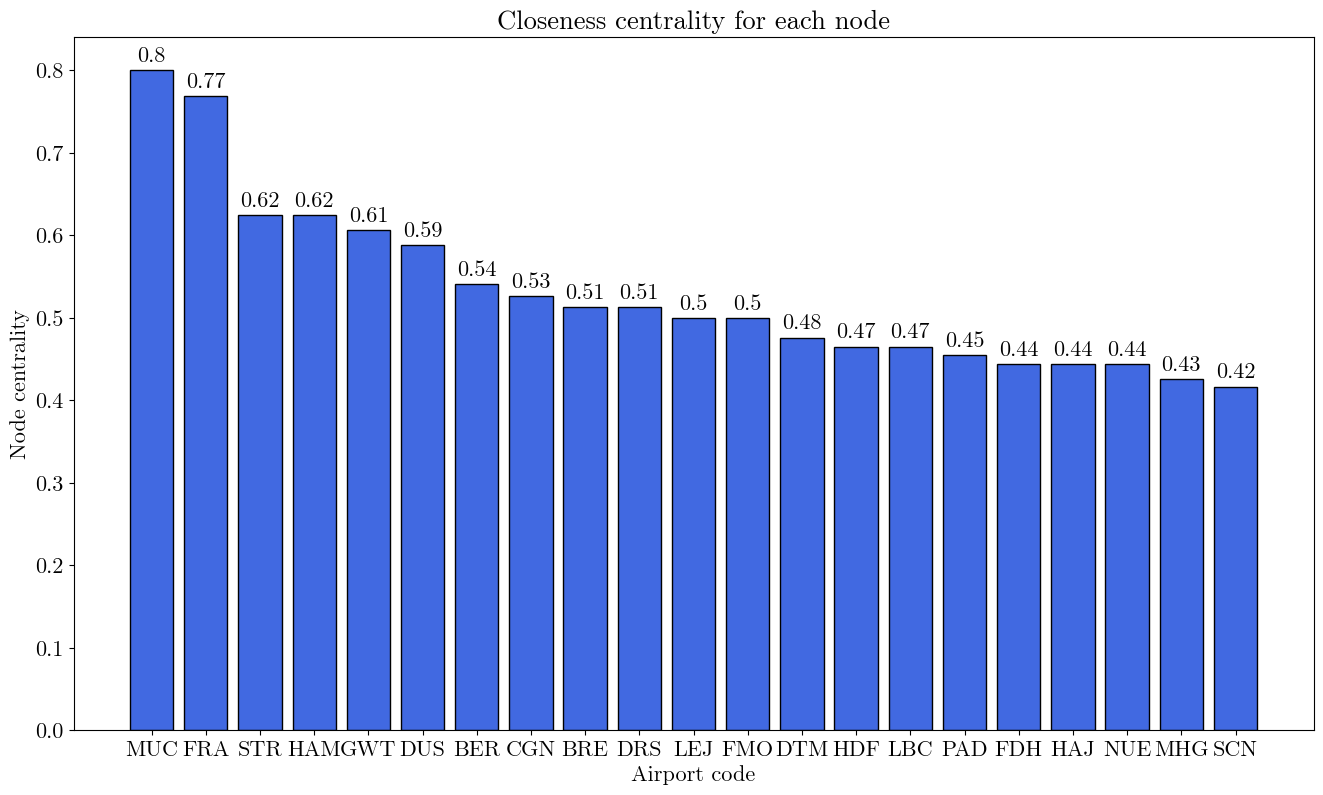

In [14]:
nodes_closeness_sorted = [
    n
    for n, v in sorted(
        nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]
values_closeness_sorted = [
    v
    for n, v in sorted(
        nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]

closeness_dict = dict(
    [
        (key, value)
        for i, (key, value) in enumerate(
            zip(nodes_closeness_sorted, values_closeness_sorted)
        )
    ]
)

plt.figure(figsize=(16, 9))
plt.bar(
    nodes_closeness_sorted,
    values_closeness_sorted,
    color="royalblue",
    width=0.8,
    edgecolor="black",
)
for i in range(len(graph.nodes)):
    plt.text(
        i,
        values_closeness_sorted[i] + 0.01,
        round(values_closeness_sorted[i], 2),
        ha="center",
    )

plt.xlabel("Airport code")
plt.ylabel("Node centrality")
plt.title("Closeness centrality for each node")

plt.savefig(
    "images/closeness_centrality_barplot.png",
    bbox_inches="tight",
    dpi=400,
)

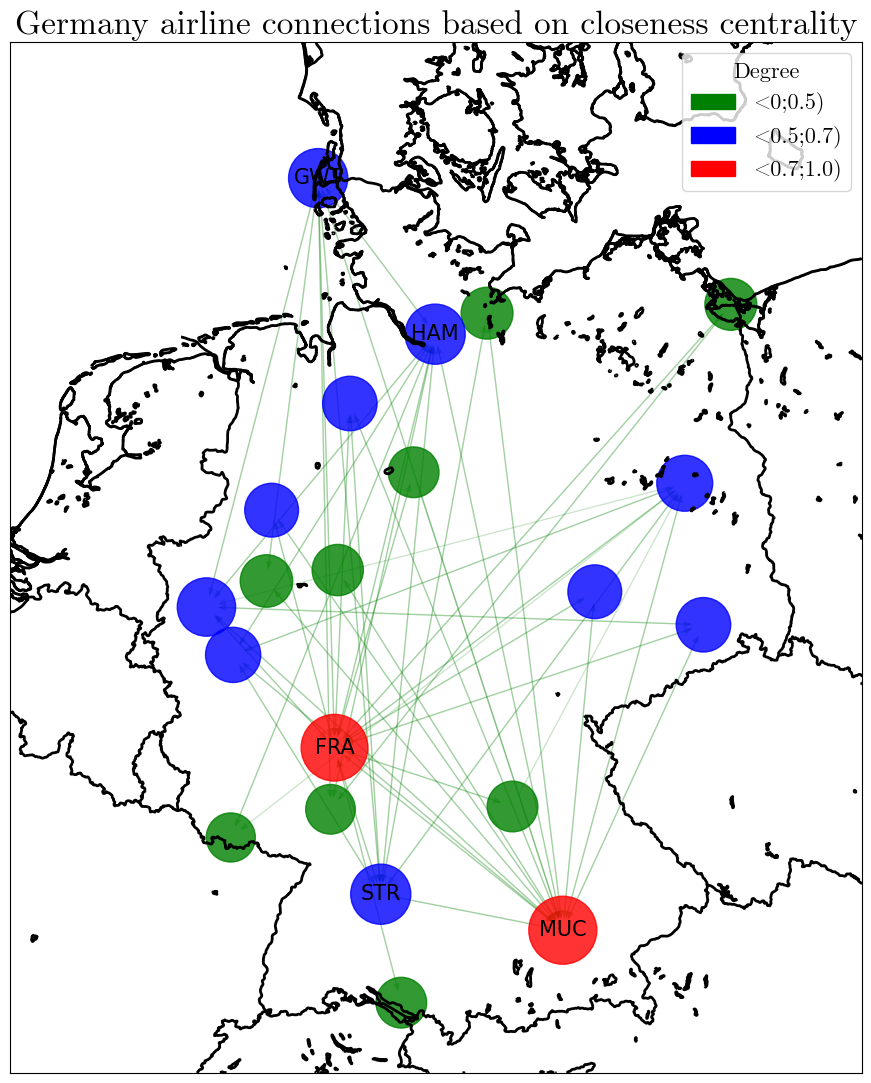

In [15]:
plt.figure(figsize=(9, 16))
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[
        node for node in nodes_closeness_sorted if 0.0 <= closeness_dict[node] < 0.5
    ],
    node_color="g",
    alpha=0.8,
    node_size=[
        closeness_dict[node] * 3000
        for node in nodes_closeness_sorted
        if 0.0 <= closeness_dict[node] < 0.5
    ],
)
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[
        node for node in nodes_closeness_sorted if 0.5 <= closeness_dict[node] < 0.7
    ],
    node_color="b",
    alpha=0.8,
    node_size=[
        closeness_dict[node] * 3000
        for node in nodes_closeness_sorted
        if 0.5 <= closeness_dict[node] < 0.7
    ],
)
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=[
        node for node in nodes_closeness_sorted if 0.7 <= closeness_dict[node] < 1.0
    ],
    node_color="r",
    alpha=0.8,
    node_size=[
        closeness_dict[node] * 3000
        for node in nodes_closeness_sorted
        if 0.7 <= closeness_dict[node] < 1.0
    ],
)
nx.draw_networkx_edges(G=graph, pos=pos, edge_color="g", alpha=0.2, arrows=True)
nx.draw_networkx_labels(
    G=graph,
    pos=pos,
    font_size=15,
    labels={x: x for x in nodes_closeness_sorted if closeness_dict[x] >= 0.6},
)

germany_map.drawcountries(linewidth=2)
germany_map.drawstates(linewidth=0.2)
germany_map.drawcoastlines(linewidth=2)
plt.tight_layout()
plt.title("Germany airline connections based on closeness centrality", fontsize=24)

green_patch = Patch(color="g", label="<0;0.5)")
blue_patch = Patch(color="b", label="<0.5;0.7)")
red_patch = Patch(color="r", label="<0.7;1.0)")
plt.legend(
    handles=[green_patch, blue_patch, red_patch],
    title="Degree",
    loc="best",
    fancybox=True,
)

plt.savefig(
    "images/networkx_closeness_on_map.png",
    bbox_inches="tight",
    dpi=400,
)

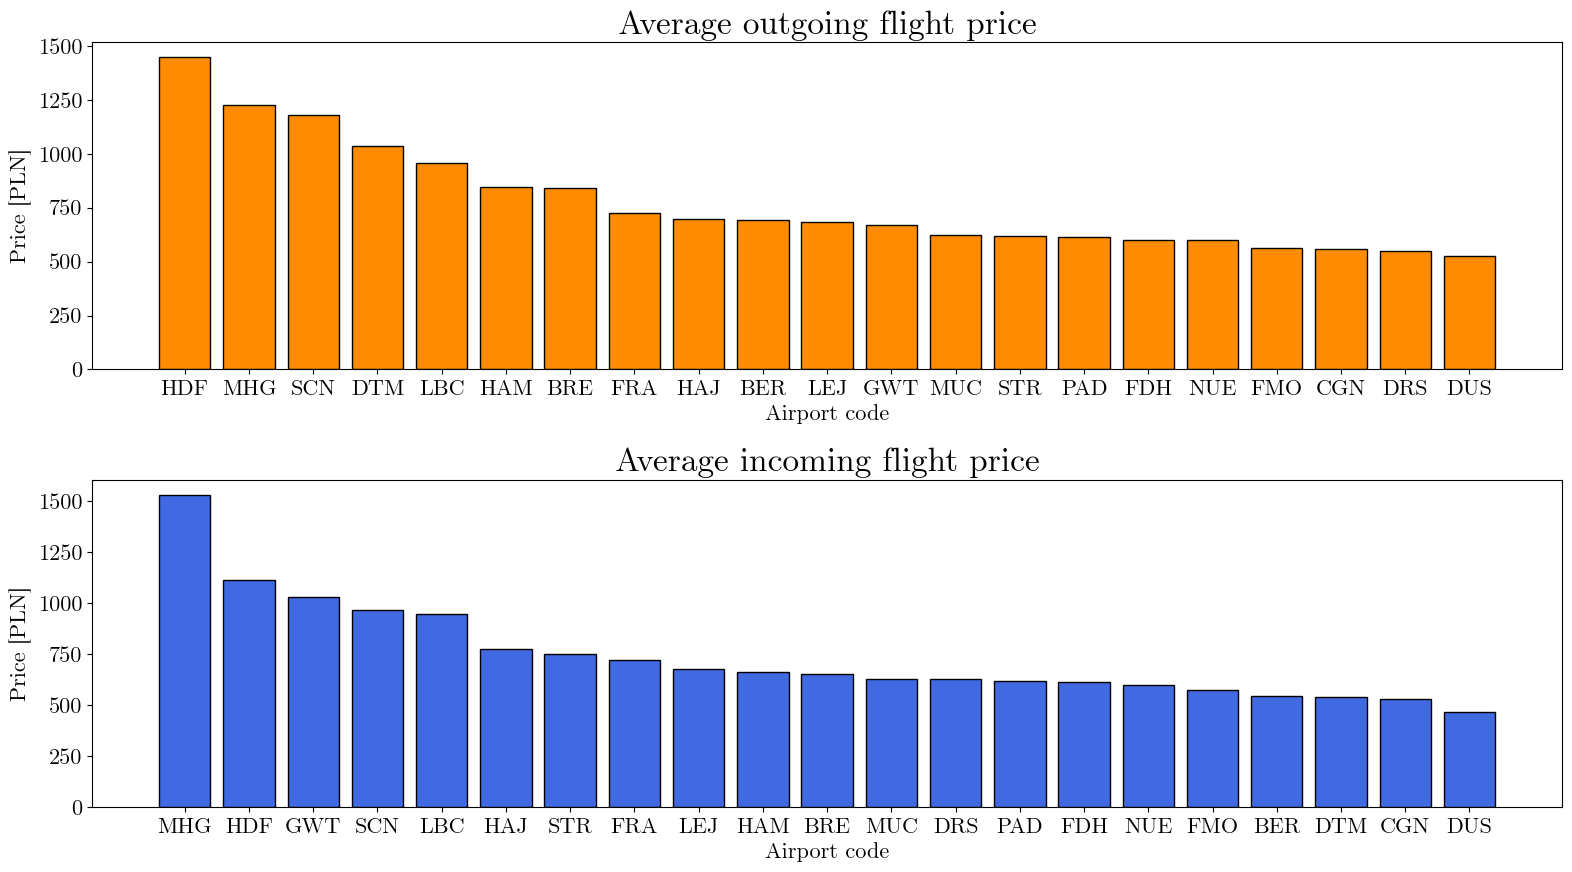

In [16]:
from statistics import mean

outgoing_weights = {}
ingoing_weights = {}
total_weights = {}

for node in graph.nodes:
    outgoing_edges = graph.out_edges(node)
    ingoing_edges = graph.in_edges(node)
    outgoing_weights[node] = []
    ingoing_weights[node] = []
    total_weights[node] = []

    for edge in outgoing_edges:
        weight = nx.path_weight(graph, path=[edge[0], edge[1]], weight="Cost")
        outgoing_weights[node].append(weight)
        total_weights[node].append(weight)

    for edge in ingoing_edges:
        weight = nx.path_weight(graph, path=[edge[0], edge[1]], weight="Cost")
        ingoing_weights[node].append(weight)
        total_weights[node].append(weight)

    outgoing_weights[node] = float(mean(outgoing_weights[node]))
    ingoing_weights[node] = float(mean(ingoing_weights[node]))
    total_weights[node] = float(mean(total_weights[node]))

mean_outgoing_weights = sorted(
    outgoing_weights.items(), key=lambda x: x[1], reverse=True
)
mean_ingoing_weights = sorted(ingoing_weights.items(), key=lambda x: x[1], reverse=True)
mean_total_weights = sorted(total_weights.items(), key=lambda x: x[1], reverse=True)

figure, axes = plt.subplots(2, 1, figsize=(16, 9))
axes[0].bar(
    [n for n, v in mean_outgoing_weights],
    [v for n, v in mean_outgoing_weights],
    color="darkorange",
    width=0.8,
    edgecolor="black",
)
axes[0].set_xlabel("Airport code")
axes[0].set_ylabel("Price [PLN]")
axes[0].set_title("Average outgoing flight price", fontsize=24)

axes[1].bar(
    [n for n, v in mean_ingoing_weights],
    [v for n, v in mean_ingoing_weights],
    color="royalblue",
    width=0.8,
    edgecolor="black",
)
axes[1].set_xlabel("Airport code")
axes[1].set_ylabel("Price [PLN]")
axes[1].set_title("Average incoming flight price", fontsize=24)

plt.tight_layout()
plt.savefig(
    "images/incoming_outgoing_price_comparison_barplot.png",
    bbox_inches="tight",
    dpi=400,
)

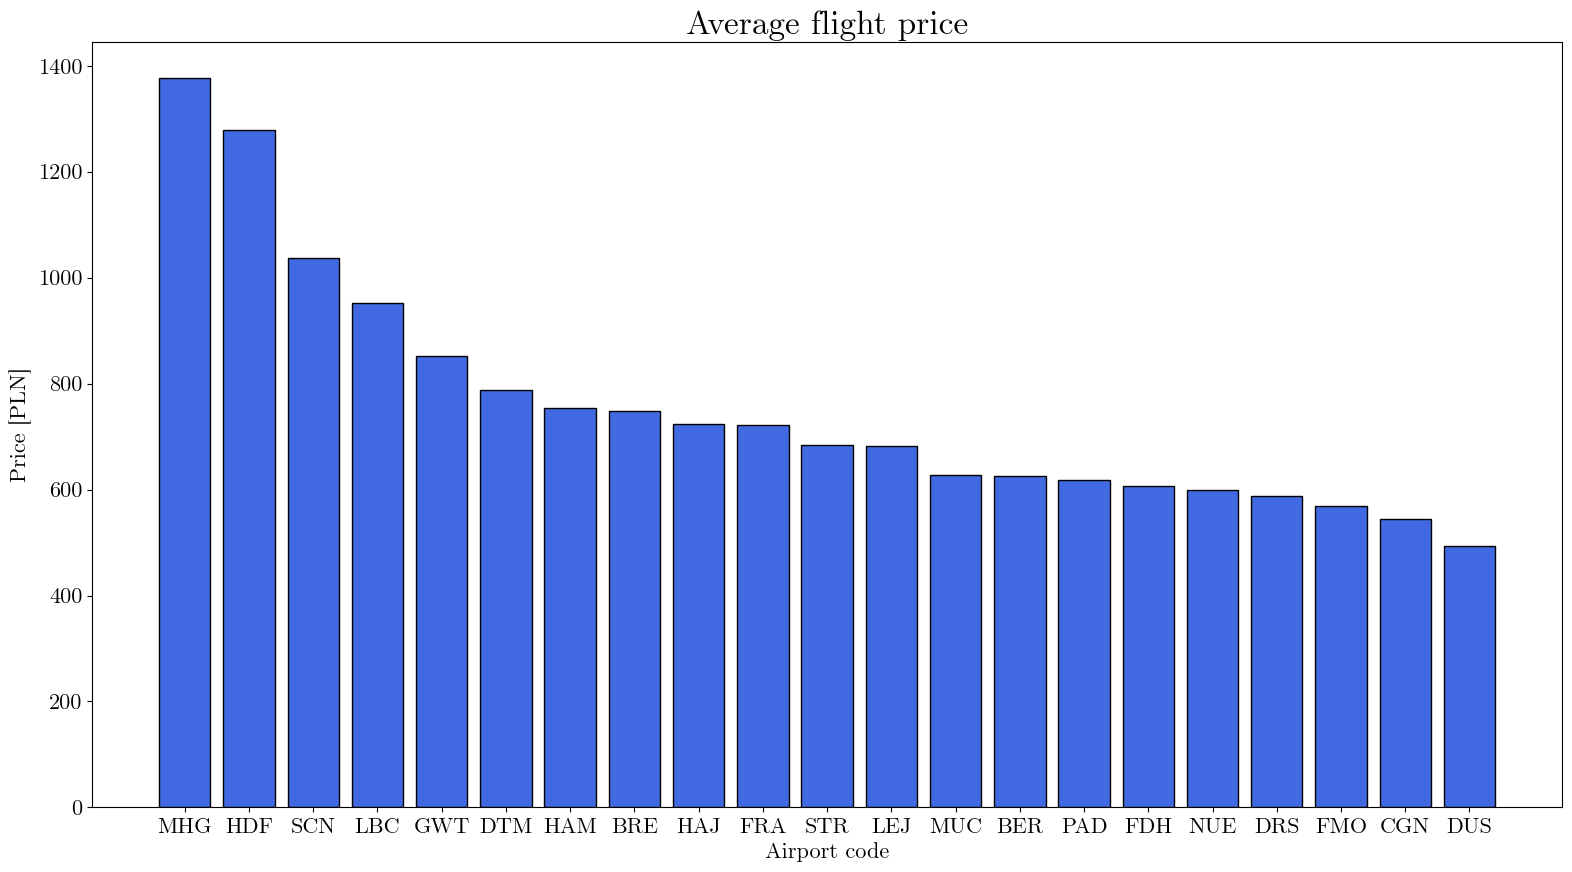

In [17]:
plt.figure(figsize=(16, 9))
plt.bar(
    [n for n, v in mean_total_weights],
    [v for n, v in mean_total_weights],
    color="royalblue",
    width=0.8,
    edgecolor="black",
)

plt.xlabel("Airport code")
plt.ylabel("Price [PLN]")
plt.title("Average flight price", fontsize=24)

plt.tight_layout()
plt.savefig(
    "images/total_price_comparison_barplot.png",
    bbox_inches="tight",
    dpi=400,
)

In [18]:
path_dict = {}
path_dict_direct_flight = {}

for node_1 in graph.nodes:
    for node_2 in graph.nodes:
        if graph.has_edge(node_1, node_2):
            path = nx.dijkstra_path(graph, source=node_1, target=node_2, weight="Cost")
            path_dict[tuple(path)] = nx.path_weight(graph, path, weight="Cost")
            if len(path) == 2:
                path_dict_direct_flight[tuple(path)] = nx.path_weight(
                    graph, path, weight="Cost"
                )

In [19]:
most_expensive_flight = max(path_dict, key=path_dict.get)
most_expensive_flight_price = max(path_dict.values())
print(most_expensive_flight, most_expensive_flight_price)

('HAM', 'MHG') 1790


In [20]:
cheapest_flight = min(path_dict, key=path_dict.get)
cheapest_flight_flight_price = min(path_dict.values())
print(cheapest_flight, cheapest_flight_flight_price)

('STR', 'BER') 282


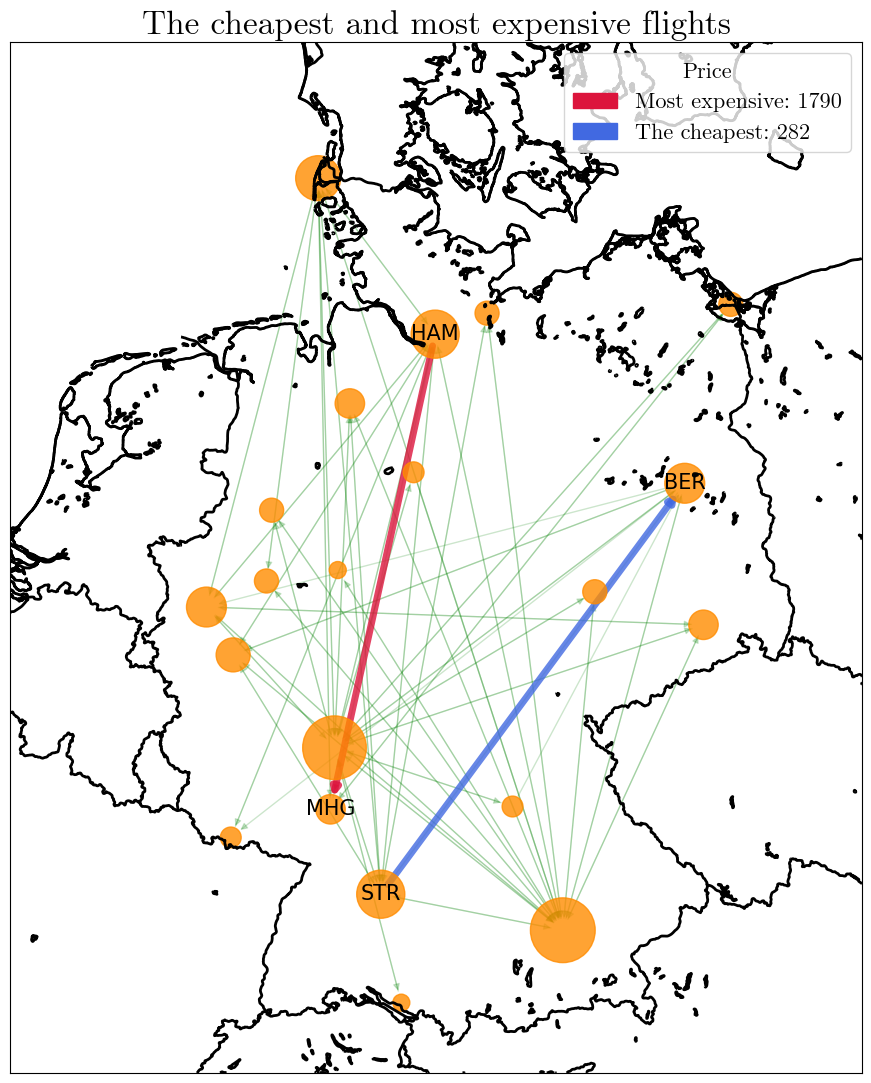

In [21]:
degrees = dict(nx.degree(graph))
plt.figure(figsize=(9, 16))
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=graph.nodes(),
    node_color="darkorange",
    node_size=[degrees[node] * 75 for node in graph.nodes()],
    alpha=0.8,
)
nx.draw_networkx_edges(
    G=graph,
    pos=pos,
    edgelist=[
        edge
        for edge in graph.edges()
        if edge not in [most_expensive_flight, cheapest_flight]
    ],
    edge_color="g",
    alpha=0.2,
    arrows=True,
)
nx.draw_networkx_edges(
    G=graph,
    pos=pos,
    edgelist=[edge for edge in graph.edges() if edge == most_expensive_flight],
    edge_color="crimson",
    width=5,
    alpha=0.8,
    arrows=True,
)
nx.draw_networkx_edges(
    G=graph,
    pos=pos,
    edgelist=[edge for edge in graph.edges() if edge == cheapest_flight],
    edge_color="royalblue",
    width=5,
    alpha=0.8,
    arrows=True,
)
nx.draw_networkx_labels(
    G=graph,
    pos=pos,
    font_size=15,
    labels={
        node: node for node in graph.nodes() if node in ["HAM", "MHG", "STR", "BER"]
    },
)

germany_map.drawcountries(linewidth=2)
germany_map.drawstates(linewidth=0.2)
germany_map.drawcoastlines(linewidth=2)
plt.tight_layout()
plt.title("The cheapest and most expensive flights", fontsize=24)

red_patch = Patch(
    color="crimson", label=f"Most expensive: {most_expensive_flight_price}"
)
blue_patch = Patch(
    color="royalblue", label=f"The cheapest: {cheapest_flight_flight_price}"
)
plt.legend(
    handles=[red_patch, blue_patch],
    title="Price",
    loc="best",
    fancybox=True,
)

plt.savefig(
    "images/expensive_cheap_on_map.png",
    bbox_inches="tight",
    dpi=400,
)

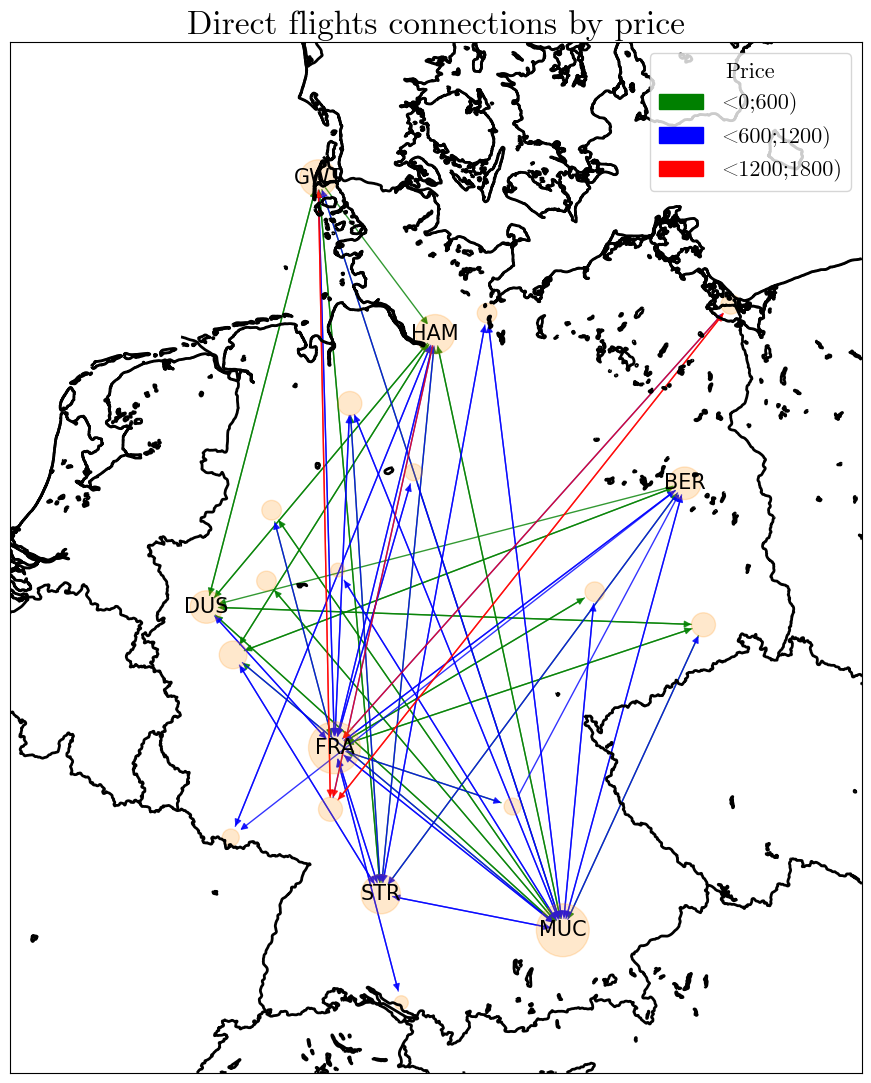

In [22]:
degrees = dict(nx.degree(graph))
plt.figure(figsize=(9, 16))
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=graph.nodes(),
    node_color="darkorange",
    node_size=[degrees[node] * 50 for node in graph.nodes()],
    alpha=0.2,
)
nx.draw_networkx_edges(
    G=graph,
    pos=pos,
    edgelist=[
        edge
        for edge in path_dict_direct_flight
        if 0 <= path_dict_direct_flight[edge] < 600
    ],
    edge_color="g",
    alpha=0.8,
    arrows=True,
)
nx.draw_networkx_edges(
    G=graph,
    pos=pos,
    edgelist=[
        edge
        for edge in path_dict_direct_flight
        if 600 <= path_dict_direct_flight[edge] < 1200
    ],
    edge_color="b",
    alpha=0.8,
    arrows=True,
)
nx.draw_networkx_edges(
    G=graph,
    pos=pos,
    edgelist=[
        edge
        for edge in path_dict_direct_flight
        if 1200 <= path_dict_direct_flight[edge] < 1800
    ],
    edge_color="r",
    alpha=0.8,
    arrows=True,
)
nx.draw_networkx_labels(
    G=graph,
    pos=pos,
    font_size=15,
    labels={node: node for node in graph.nodes() if degrees[node] >= 10},
)

germany_map.drawcountries(linewidth=2)
germany_map.drawstates(linewidth=0.2)
germany_map.drawcoastlines(linewidth=2)
plt.tight_layout()
plt.title("Direct flights connections by price", fontsize=24)


green_patch = Patch(color="g", label="<0;600)")
blue_patch = Patch(color="b", label="<600;1200)")
red_patch = Patch(color="r", label="<1200;1800)")

plt.legend(
    handles=[green_patch, blue_patch, red_patch],
    title="Price",
    loc="best",
    fancybox=True,
)

plt.savefig(
    "images/flights_price_comparison_on_map.png",
    bbox_inches="tight",
    dpi=400,
)